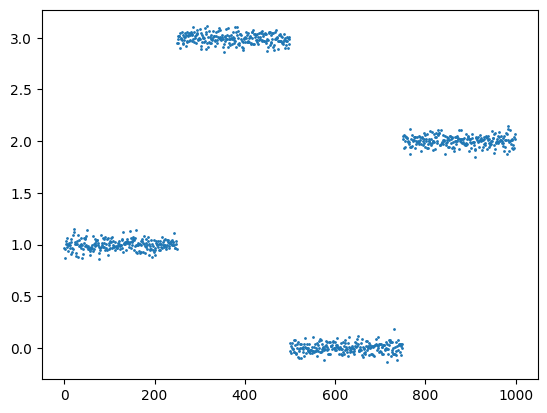

In [11]:
import matplotlib.pyplot as plt

s = []
file_in = open('signal.txt', 'r')
for i in file_in.read().split('\n'):
    try:
        s.append(float(i))
    except:
        pass

xaxis = range(len(s))

plt.scatter(xaxis, s, s=1)

In [12]:
import numpy as np

iden_999 = np.identity(999)

l1 = np.c_[iden_999, np.zeros(999)]

l2 = np.c_[np.zeros(999), -iden_999]

L = l1 + l2

LT = np.transpose(L)

I = np.identity(1000)

lam = [0.1, 1, 10, 100, 1000]
Mdict = dict()
denoised = dict()

for l in lam:
    Mdict[l] = I + l * (LT @ L)
    denoised[l] = np.linalg.solve(Mdict[l], s)

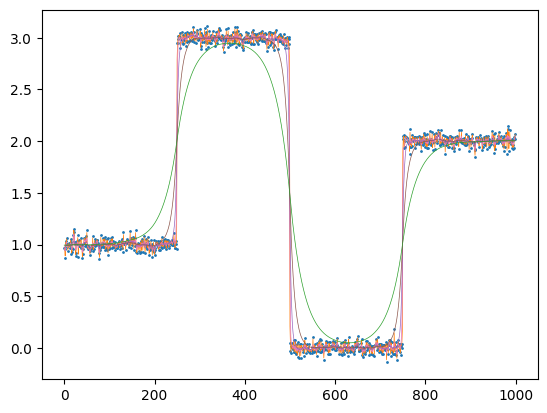

In [13]:
plt.scatter(xaxis, s, s=1)
plt.plot(xaxis, denoised[0.1], 'tab:orange', lw = 0.5)
plt.plot(xaxis, denoised[1], 'tab:pink', lw = 0.5)
plt.plot(xaxis, denoised[10], 'tab:purple', lw = 0.5)
plt.plot(xaxis, denoised[100], 'tab:brown', lw = 0.5)
plt.plot(xaxis, denoised[1000], 'tab:green', lw = 0.5)

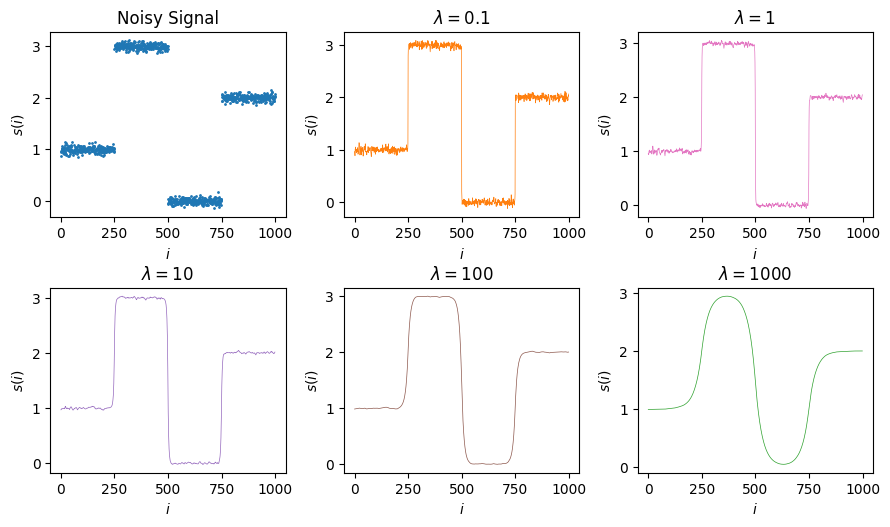

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 5))
fig.tight_layout(w_pad=0.8, h_pad=3)

ax1.scatter(xaxis, s, s=1)
ax1.set_title("Noisy Signal")
ax1.set_xlabel(r"$i$")
ax1.set_ylabel(r"$s(i)$")

ax2.plot(xaxis, denoised[0.1], 'tab:orange', lw = 0.5)
ax2.set_title(r'$\lambda = 0.1$')
ax2.set_xlabel(r"$i$")
ax2.set_ylabel(r"$s(i)$")

ax3.plot(xaxis, denoised[1], 'tab:pink', lw = 0.5)
ax3.set_title(r'$\lambda = 1$')
ax3.set_xlabel(r"$i$")
ax3.set_ylabel(r"$s(i)$")

ax4.plot(xaxis, denoised[10], 'tab:purple', lw = 0.5)
ax4.set_title(r'$\lambda = 10$')
ax4.set_xlabel(r"$i$")
ax4.set_ylabel(r"$s(i)$")

ax5.plot(xaxis, denoised[100], 'tab:brown', lw = 0.5)
ax5.set_title(r'$\lambda = 100$')
ax5.set_xlabel(r"$i$")
ax5.set_ylabel(r"$s(i)$")

ax6.plot(xaxis, denoised[1000], 'tab:green', lw = 0.5)
ax6.set_title(r'$\lambda = 1000$')
ax6.set_xlabel(r"$i$")
ax6.set_ylabel(r"$s(i)$")

plt.show()

fig.savefig('plots1.pdf', bbox_inches='tight')

$$
\hat{A} = \begin{bmatrix} I \\ \sqrt{\lambda} L \end{bmatrix} \in \mathbb{R}^{1999 \times 1000}, \ I \in \mathbb{R}^{1000 \times 1000}, \ L \in \mathbb{R}^{999 \times 999}
$$

$$
\hat{\bold{b}} = \begin{bmatrix} \bold{s} \\ \bold{0} \end{bmatrix} \in \mathbb{R}^{1999}, \ \bold{s} \in \mathbb{R}^{1000}, \bold{0} \in \mathbb{R}^{999}
$$

In [15]:
delta = 10e-5
Ahat_dict = dict()
bhat = np.r_[s.copy(), np.zeros(999)]
ordinary = dict()

def solve(A, W, b):
    AT = np.transpose(A)
    return np.linalg.solve(AT @ W @ A, np.dot(AT @ W, b))

for l in lam:
    Ahat_dict[l] = np.r_[I, np.sqrt(l) * L]
    w = np.ones(1999)
    W = np.diag(w)
    for _ in range(100):
        x = solve(Ahat_dict[l], W, bhat)
        diff = np.dot(Ahat_dict[l], x) - bhat
        for i in range(1999):
            w[i] = 1 / max(delta, abs(diff[i]))
        W = np.diag(w)

    ordinary[l] = x

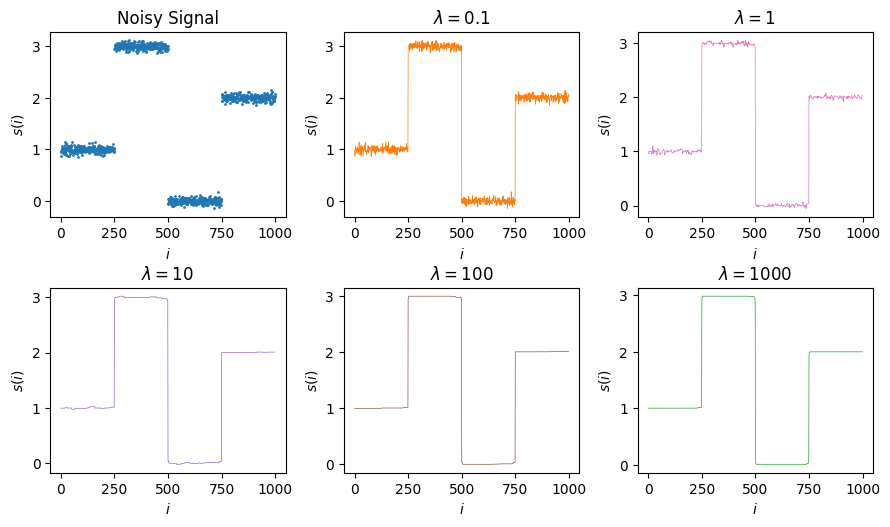

In [16]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 5))
fig.tight_layout(w_pad=0.8, h_pad=3)

ax1.scatter(xaxis, s, s=1)
ax1.set_title("Noisy Signal")
ax1.set_xlabel(r"$i$")
ax1.set_ylabel(r"$s(i)$")

ax2.plot(xaxis, ordinary[0.1], 'tab:orange', lw = 0.5)
ax2.set_title(r'$\lambda = 0.1$')
ax2.set_xlabel(r"$i$")
ax2.set_ylabel(r"$s(i)$")

ax3.plot(xaxis, ordinary[1], 'tab:pink', lw = 0.5)
ax3.set_title(r'$\lambda = 1$')
ax3.set_xlabel(r"$i$")
ax3.set_ylabel(r"$s(i)$")

ax4.plot(xaxis, ordinary[10], 'tab:purple', lw = 0.5)
ax4.set_title(r'$\lambda = 10$')
ax4.set_xlabel(r"$i$")
ax4.set_ylabel(r"$s(i)$")

ax5.plot(xaxis, ordinary[100], 'tab:brown', lw = 0.5)
ax5.set_title(r'$\lambda = 100$')
ax5.set_xlabel(r"$i$")
ax5.set_ylabel(r"$s(i)$")

ax6.plot(xaxis, ordinary[1000], 'tab:green', lw = 0.5)
ax6.set_title(r'$\lambda = 1000$')
ax6.set_xlabel(r"$i$")
ax6.set_ylabel(r"$s(i)$")

plt.show()

fig.savefig('plots2.pdf', bbox_inches='tight')